In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
!ls
import os
%cd '/content/drive/MyDrive/Colab Notebooks/detection_de_fraude/pgm/'
!ls

drive  sample_data
/content/drive/MyDrive/Colab Notebooks/detection_de_fraude/pgm
detection_de_fraude_pgm.ipynb
model_rf_base_penalite_1.pkl
model_rf_base_penalite_2.pkl
model_rf_base_penalite_3.pkl
model_rf_base_penalite_4.pkl
model_rf_base_penalite_5.pkl
model_rf_base_penalite_6.pkl
model_rf_base_penalite_7.pkl
model_rf_base.pkl
model_rf_base_prob_0.35.pkl
model_rf_base_prob_0.39999999999999997.pkl
model_rf_base_prob_0.3.pkl
model_rf_base_prob_0.44999999999999996.pkl
model_rf_base_prob_0.49999999999999994.pkl
model_rf_base_prob_0.5499999999999999.pkl
model_rf_base_prob_0.5999999999999999.pkl
model_rf_base_prob_0.6499999999999999.pkl
model_rf_base_prob_0.7.pkl
model_rf_base_r_over.pkl
model_rf_base_r_SMOTE.pkl
model_rf_base_r_under.pkl


In [ ]:
!pip3 install seaborn
!pip3 install scikit-learn
!pip3 install joblib
!pip3 install xgboost
!pip3 install imblearn


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn import metrics 
from sklearn import preprocessing 
from sklearn import model_selection  
from sklearn.model_selection import train_test_split 
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score, auc, accuracy_score 
from sklearn.linear_model import LogisticRegression 
from sklearn import ensemble 

import xgboost as XGB

from imblearn.under_sampling import RandomUnderSampler, ClusterCentroids
from imblearn.over_sampling import SMOTE, RandomOverSampler, SMOTENC, ADASYN

import joblib



In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/detection_de_fraude/creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [ ]:
def scale_feat(df,cont_feat):
  df1=df 
  scaler = preprocessing.RobustScaler()
  df1[cont_feat] = scaler.fit_transform(df1[cont_feat])
  return df1

# on va normaliser les valeurs
cont_feat_list = list(df.columns)
cont_feat_list.remove("Class")

df = scale_feat(df,cont_feat_list)
df.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-0.994983,-0.616237,-0.098602,1.228905,0.878152,-0.217859,0.631245,0.177406,0.142432,0.334787,...,0.026866,0.253109,-0.320791,0.032681,0.167619,-0.241182,0.816731,-0.246091,1.783274,0
1,-0.994983,0.524929,0.143100,-0.006970,0.293974,0.087726,0.164395,-0.105740,0.117064,-0.164482,...,-0.473332,-0.602719,0.363442,-0.479557,0.225462,0.313475,-0.063781,0.026519,-0.269825,0
2,-0.994972,-0.615587,-1.002407,0.830932,0.251024,-0.344345,1.778007,0.668164,0.420388,-1.179796,...,0.668917,0.714254,2.974603,-0.919589,-0.515430,-0.153111,-0.350218,-0.540962,4.983721,0
3,-0.994972,-0.440239,-0.178789,0.841250,-0.529808,0.033775,1.303832,0.175637,0.662489,-1.076888,...,-0.190105,-0.001408,-0.578786,-1.531963,0.944482,-0.298959,0.379163,0.382611,1.418291,0
4,-0.994960,-0.526089,0.579239,0.713861,0.265632,-0.270695,0.317183,0.491625,-0.546463,0.700808,...,0.048266,0.739092,-0.407980,0.126293,-0.333308,0.976221,1.347133,1.553716,0.670579,0


In [ ]:
df[cont_feat_list].describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,...,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000
mean,0.118914,-0.008099,-0.046700,-0.093789,0.012467,0.041684,0.234978,-0.035663,-0.041715,0.041467,...,0.181230,0.071003,-0.006333,0.036166,-0.051600,-0.024846,0.091805,-0.008291,-0.085674,0.927124
std,0.557903,0.875976,1.177594,0.790721,0.889375,1.058858,1.141757,1.100116,2.228372,0.885825,...,2.236107,1.770910,0.677653,2.017718,0.762671,0.780519,0.849087,2.493334,2.515117,3.495006
min,-0.994983,-25.234901,-51.902285,-25.295389,-3.557406,-87.216663,-22.184587,-38.770014,-136.646287,-10.790391,...,-157.892131,-83.903734,-10.215599,-144.743845,-3.623671,-15.440333,-4.494188,-139.401862,-117.657402,-0.307413
25%,-0.358210,-0.419712,-0.473542,-0.558111,-0.520605,-0.488876,-0.423451,-0.528388,-0.430967,-0.477061,...,-0.432879,-0.479648,-0.512775,-0.486782,-0.498118,-0.499713,-0.483936,-0.445883,-0.489209,-0.229162
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.641790,0.580288,0.526458,0.441889,0.479395,0.511124,0.576549,0.471612,0.569033,0.522939,...,0.567121,0.520352,0.487225,0.513218,0.501882,0.500287,0.516064,0.554117,0.510791,0.770838
max,1.035022,1.089805,15.683274,4.799177,10.612681,26.739834,63.054506,107.201520,37.286865,12.615676,...,114.523532,65.656022,9.801353,72.828591,5.721572,11.234373,6.285011,195.267780,257.822531,358.683155


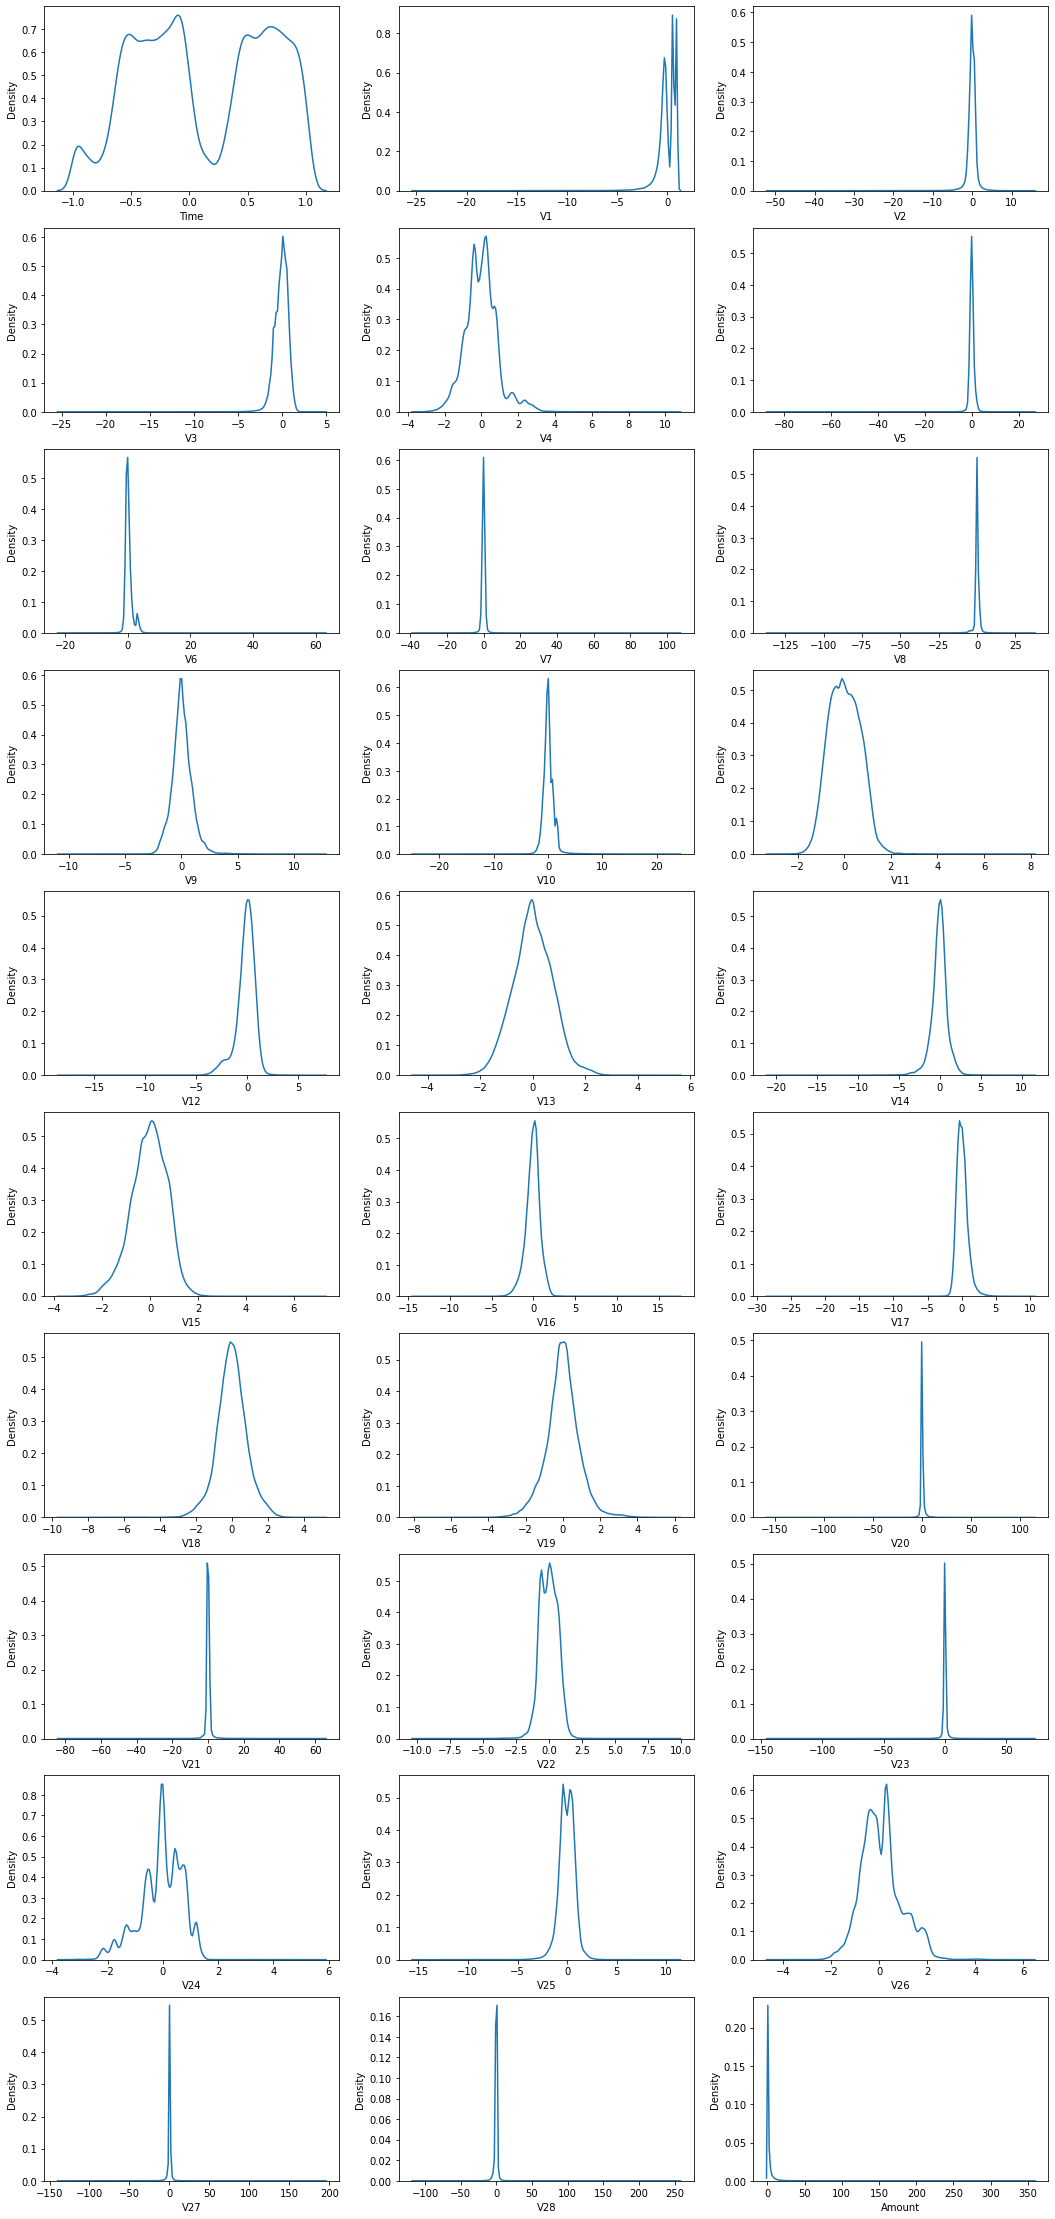

In [ ]:
fig, axs = plt.subplots(len(cont_feat_list)//3 , 3 , figsize=[18,40] )
axs= axs.flatten()
for i in range(len(cont_feat_list)) :
  sns.kdeplot(df[cont_feat_list[i]], ax=axs[i])

In [ ]:
df.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

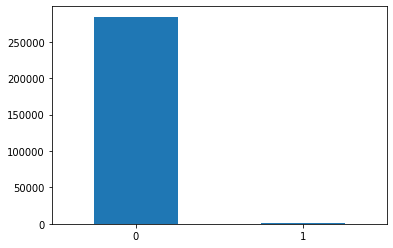

In [ ]:
df["Class"].value_counts(sort=False).plot.bar(rot=0)

In [ ]:
X = df.drop(['Class'], axis=1)
y = df.Class
X_train, X_test, y_train, y_test =  train_test_split(X,y, test_size=0.2, random_state = 1, stratify = y )

In [ ]:
rf = ensemble.RandomForestClassifier() 
rf.fit(X_train, y_train)
y_rf= rf.predict(X_test)

print("Confusion Matrix : \n ", confusion_matrix(y_test, y_rf), " \n ")
print("Accuracy Score : \n ", accuracy_score(y_test, y_rf), "\n")
print("Classification Report : \n", classification_report(y_test,y_rf) , "\n")

joblib.dump(rf, os.path.expanduser("./model_rf_base.pkl"))

Confusion Matrix : 
  [[56858     6]
 [   15    83]]  
 
Accuracy Score : 
  0.9996313331694814 

Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.93      0.85      0.89        98

    accuracy                           1.00     56962
   macro avg       0.97      0.92      0.94     56962
weighted avg       1.00      1.00      1.00     56962
 



['./model_rf_base.pkl']

## Traitement du déséquilibrage des données


- sous-echantillonage ou UnderSampling

In [ ]:
r_under = RandomUnderSampler() # CLusterCentroids()
X_train_r_under, y_train_r_under = r_under.fit_resample(X_train, y_train)
y_train_r_under.value_counts()

0    394
1    394
Name: Class, dtype: int64

In [ ]:
def rf_func(X_train, y_train, X_test, y_test, name ):
  rf = ensemble.RandomForestClassifier() 
  rf.fit(X_train, y_train)
  y_rf= rf.predict(X_test)

  print("Confusion Matrix : \n ", confusion_matrix(y_test, y_rf), " \n ")
  print("Accuracy Score : \n ", accuracy_score(y_test, y_rf), "\n")
  print("Classification Report : \n", classification_report(y_test,y_rf) , "\n")
 
  joblib.dump(rf, os.path.expanduser("./model_rf_base_{name}.pkl".format(name = str(name))))
  return rf



In [ ]:
rf_func(X_train_r_under, y_train_r_under, X_test, y_test, name="r_under" )

Confusion Matrix : 
  [[55552  1312]
 [    8    90]]  
 
Accuracy Score : 
  0.9768266563674028 

Classification Report : 
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.06      0.92      0.12        98

    accuracy                           0.98     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.98      0.99     56962
 



RandomForestClassifier()

- sur-echantillonage ou OverSampling

In [ ]:
r_over = RandomOverSampler() 
X_train_r_over, y_train_r_over = r_over.fit_resample(X_train, y_train)
y_train_r_over.value_counts()
rf_func(X_train_r_over, y_train_r_over, X_test, y_test, name="r_over" )

Confusion Matrix : 
  [[56856     8]
 [   15    83]]  
 
Accuracy Score : 
  0.9995962220427653 

Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.91      0.85      0.88        98

    accuracy                           1.00     56962
   macro avg       0.96      0.92      0.94     56962
weighted avg       1.00      1.00      1.00     56962
 



RandomForestClassifier()

In [ ]:
y_train_r_over.value_counts()

0    227451
1    227451
Name: Class, dtype: int64

- SMOTE, SMOTENC, ADASYN

In [ ]:
r_SMOTE= SMOTE() 
X_train_r_SMOTE, y_train_r_SMOTE = r_SMOTE.fit_resample(X_train, y_train)
y_train_r_SMOTE.value_counts()


0    227451
1    227451
Name: Class, dtype: int64

In [ ]:
rf_func(X_train_r_SMOTE, y_train_r_SMOTE, X_test, y_test, name="r_SMOTE" )

Confusion Matrix : 
  [[56846    18]
 [   13    85]]  
 
Accuracy Score : 
  0.9994557775359011 

Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.83      0.87      0.85        98

    accuracy                           1.00     56962
   macro avg       0.91      0.93      0.92     56962
weighted avg       1.00      1.00      1.00     56962
 



RandomForestClassifier()

- modifier le seuil des probabilités et tester

In [ ]:
list_proba = np.arange(0.3, 0.75, 0.05)
list_proba

array([0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55, 0.6 , 0.65, 0.7 ])

In [ ]:

for list_proba_i in list_proba :
  rf3 = ensemble.RandomForestClassifier() 
  rf3.fit(X_train, y_train)
  y_rf3= rf3.predict(X_test)
  probs = rf3.predict_proba(X_test)
  pred_class = (probs[:,1]>= list_proba_i ).astype("int")
  print( "list_proba_i = " ,list_proba_i)
  print(pd.crosstab(y_test,pred_class))
 
  joblib.dump(rf3, os.path.expanduser("./model_rf_base_prob_{name}.pkl".format(name = str(list_proba_i))))
  

list_proba_i =  0.3
col_0      0   1
Class           
0      56853  11
1         12  86
list_proba_i =  0.35
col_0      0   1
Class           
0      56854  10
1         11  87
list_proba_i =  0.39999999999999997
col_0      0   1
Class           
0      56855   9
1         14  84
list_proba_i =  0.44999999999999996
col_0      0   1
Class           
0      56857   7
1         14  84
list_proba_i =  0.49999999999999994
col_0      0   1
Class           
0      56857   7
1         14  84
list_proba_i =  0.5499999999999999
col_0      0   1
Class           
0      56859   5
1         15  83
list_proba_i =  0.5999999999999999
col_0      0   1
Class           
0      56860   4
1         16  82
list_proba_i =  0.6499999999999999
col_0      0   1
Class           
0      56860   4
1         17  81
list_proba_i =  0.7
col_0      0   1
Class           
0      56860   4
1         17  81


- model pénalisé

In [ ]:

for i_w in range(1,8,1) :
  rf4 = ensemble.RandomForestClassifier(class_weight = {0:1, 1:i_w}) 
  rf4.fit(X_train, y_train)
  y_rf4= rf4.predict(X_test)

  print("Confusion Matrix : \n ", confusion_matrix(y_test, y_rf4), " \n ")
  print("Accuracy Score : \n ", accuracy_score(y_test, y_rf4), "\n")
  print("Classification Report : \n", classification_report(y_test,y_rf4) , "\n")
 
  joblib.dump(rf4, os.path.expanduser("./model_rf_base_penalite_{name}.pkl".format(name = str(i_w))))

Confusion Matrix : 
  [[56858     6]
 [   15    83]]  
 
Accuracy Score : 
  0.9996313331694814 

Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.93      0.85      0.89        98

    accuracy                           1.00     56962
   macro avg       0.97      0.92      0.94     56962
weighted avg       1.00      1.00      1.00     56962
 

Confusion Matrix : 
  [[56858     6]
 [   14    84]]  
 
Accuracy Score : 
  0.9996488887328394 

Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.93      0.86      0.89        98

    accuracy                           1.00     56962
   macro avg       0.97      0.93      0.95     56962
weighted avg       1.00      1.00      1.00     56962
 

Confusion Matrix : 
  [[56857     7]
 [   14    84]]  
 
Accuracy Score : 
  0.999631333169481

In [ ]:
from imblearn.ensemble import BalancedRandomForestClassifier
bclf = BalancedRandomForestClassifier() 
bclf.fit(X_train, y_train)
y_bclf= bclf.predict(X_test)

print("Confusion Matrix : \n ", confusion_matrix(y_test, y_bclf), " \n ")
print("Accuracy Score : \n ", accuracy_score(y_test, y_bclf), "\n")
print("Classification Report : \n", classification_report(y_test,y_bclf) , "\n")


joblib.dump(bclf, os.path.expanduser("./model_rf_base_prob_bclf.pkl"))

Confusion Matrix : 
  [[55239  1625]
 [    8    90]]  
 
Accuracy Score : 
  0.97133176503634 

Classification Report : 
               precision    recall  f1-score   support

           0       1.00      0.97      0.99     56864
           1       0.05      0.92      0.10        98

    accuracy                           0.97     56962
   macro avg       0.53      0.94      0.54     56962
weighted avg       1.00      0.97      0.98     56962
 



['./model_rf_base_prob_bclf.pkl']

De tous nos résultats, le meilleur modèl est cell qui a fourni les indicateurs suivant :


```
Confusion Matrix : 
  [[56858     6]
 [   14    84]]  
 
Accuracy Score : 
  0.9996488887328394 

Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.93      0.86      0.89        98

    accuracy                           1.00     56962
   macro avg       0.97      0.93      0.95     56962
weighted avg       1.00      1.00      1.00     56962



```
Il présente le meilleur F1-score et précision. Aussi, sa matrice de confusion est la mùeilleur. Il faut noter que l'objectif de ce document n'est pas de trouver le meilleur modèle, mais de montrer comment traiter le déséquilibrage de donnée quand on fait de la detction de fraud.

Pour trouver un meilleur modèles, il faudra tester d'autres algorithm de Machine learning et optimiser leurs hyperparamètre par les méthodes de grid search ou par de l'optimisation bayesien. Il faudra aussi faire du k-fold pour avoir un modèle plus robuste et reduire le sur-apprentissage.
